In [1]:
import linear_dataset
import numpy as np

X, y = linear_dataset.random_linear_dataset()
m = len(y)

def learning_schedule(t, t0=5, t1=50):
    return t0 / (t + t1)

n_epochs = 50

theta = np.random.randn(2, 1)
theta_history = []

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta_history.append(theta)
        theta = theta - learning_rate * gradients

In [2]:
print(theta)

[[4.14971532]
 [2.67856191]]


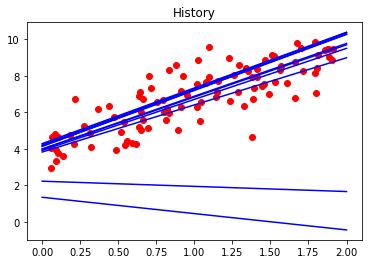

In [3]:
import matplotlib.pyplot as plt

plt.figure('History')
plt.title('History')
plt.scatter(X[:,1], y, c='r', marker='o')

for t in theta_history[:10]:
    slope, intercept = t[1], t[0]
    plt.plot([0, 2], [intercept, 2*slope+intercept], color='b')
plt.show()

In [4]:
from sklearn.linear_model import SGDRegressor

Xc = X[:,1].reshape((m,1))
yc = y.ravel()

sgd_reg = SGDRegressor(max_iter=50, penalty=None,
                       eta0=0.1, tol=-np.infty)
sgd_reg.fit(Xc, yc)

print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.12886636]
[2.69007619]


In [9]:
def invscaling(epochs):
    eta0 = 0.01
    power_t = 0.25
    eta = eta0
    for t in range(epochs):
        yield eta
        eta = eta0 / (np.power(t, power_t))

/Users/guhwanbae/anaconda3/envs/gu-keras/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


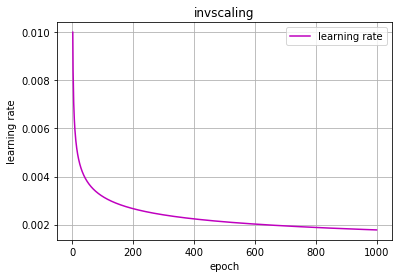

In [12]:
history = []
for eta in invscaling(1000):
    history.append(eta)
epochs = np.arange(1000)
plt.figure('invscaling')
plt.title('invscaling')
plt.plot(epochs, history, color='m', label='learning rate')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.legend()
plt.grid()
plt.show()